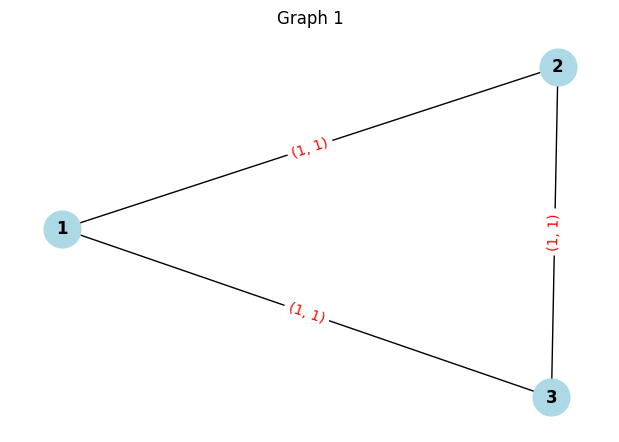

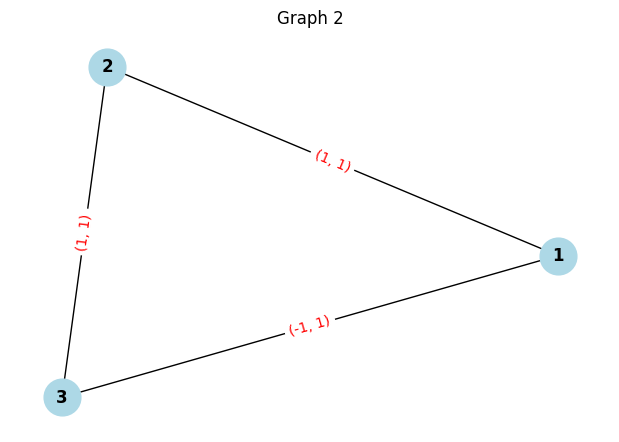

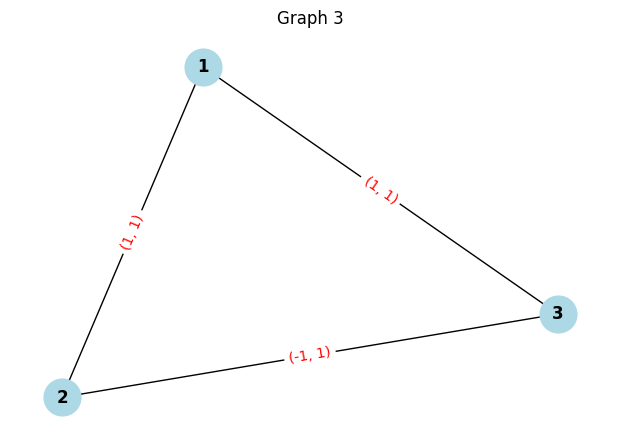

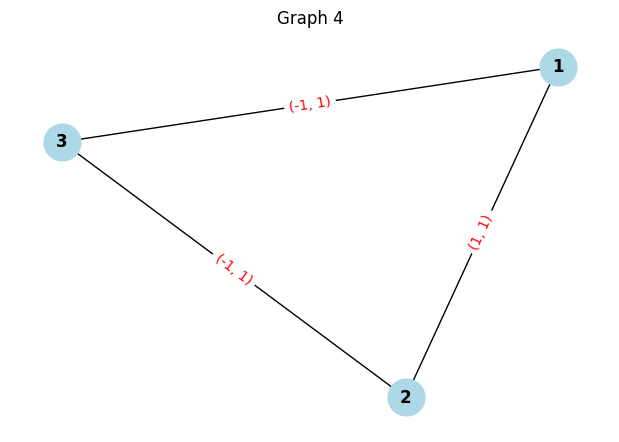

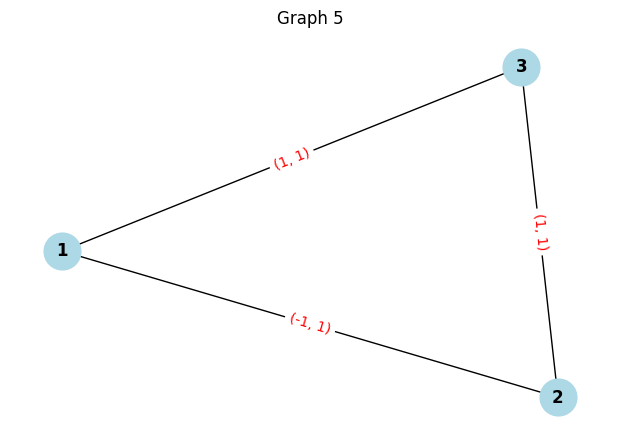

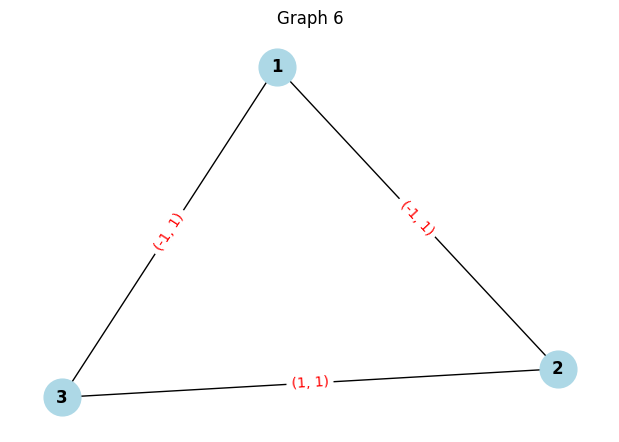

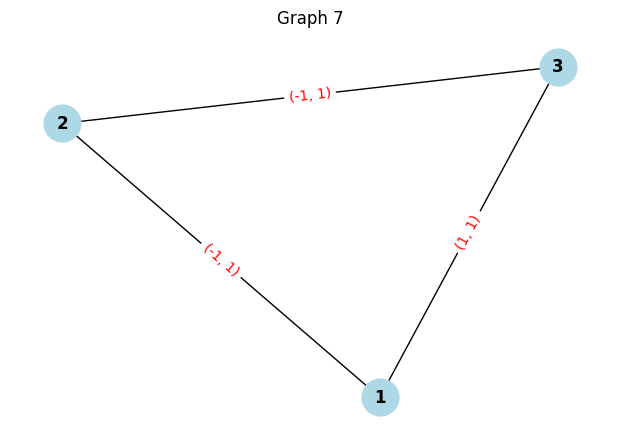

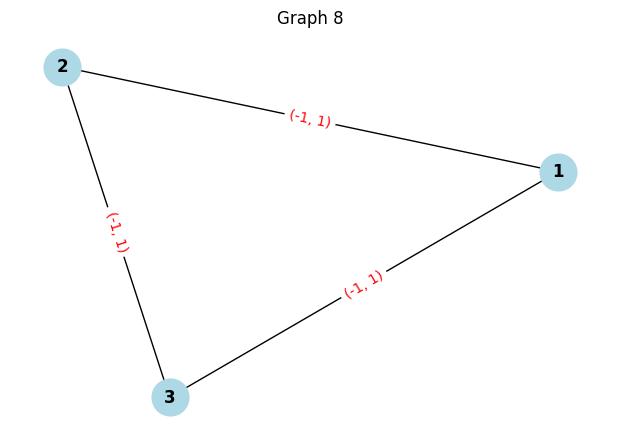

In [1]:
import re
import networkx as nx
import matplotlib.pyplot as plt

# Raw output from testClique
output = """
[(Graph {vertices = [1,2,3], edges = [(1,(1,1),2),(2,(1,1),3),(1,(1,1),3)]},0),
 (Graph {vertices = [1,2,3], edges = [(1,(1,1),2),(2,(1,1),3),(1,(-1,1),3)]},0),
 (Graph {vertices = [1,2,3], edges = [(1,(1,1),2),(2,(-1,1),3),(1,(1,1),3)]},0),
 (Graph {vertices = [1,2,3], edges = [(1,(1,1),2),(2,(-1,1),3),(1,(-1,1),3)]},0),
 (Graph {vertices = [1,2,3], edges = [(1,(-1,1),2),(2,(1,1),3),(1,(1,1),3)]},0),
 (Graph {vertices = [1,2,3], edges = [(1,(-1,1),2),(2,(1,1),3),(1,(-1,1),3)]},0),
 (Graph {vertices = [1,2,3], edges = [(1,(-1,1),2),(2,(-1,1),3),(1,(1,1),3)]},0),
 (Graph {vertices = [1,2,3], edges = [(1,(-1,1),2),(2,(-1,1),3),(1,(-1,1),3)]},0)]
"""

# Regular expressions to parse vertices and edges
graph_pattern = re.compile(r"Graph {vertices = \[(.*?)\], edges = \[(.*?)\]}")
edge_pattern = re.compile(r"\((\d+),\((-?\d+),(-?\d+)\),(\d+)\)")

# Parse the graphs from the output string
graphs_data = []
for graph_match in graph_pattern.finditer(output):
    vertices = list(map(int, graph_match.group(1).split(',')))
    edges_text = graph_match.group(2)
    edges = []
    for edge_match in edge_pattern.finditer(edges_text):
        u = int(edge_match.group(1))
        weight = (int(edge_match.group(2)), int(edge_match.group(3)))  # Edge weight as a tuple
        v = int(edge_match.group(4))
        edges.append((u, weight, v))
    graphs_data.append({"vertices": vertices, "edges": edges})

# Function to draw each graph
def draw_graph(graph_data, graph_number):
    G = nx.Graph()
    G.add_nodes_from(graph_data["vertices"])

    # Adding edges with labels
    edges_with_labels = {}
    for u, weight, v in graph_data["edges"]:
        G.add_edge(u, v)
        edges_with_labels[(u, v)] = weight

    # Draw the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=12, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edges_with_labels, font_color="red", font_size=10)
    plt.title(f"Graph {graph_number}")
    plt.axis("off")
    plt.show()

# Draw each parsed graph
for i, graph_data in enumerate(graphs_data, start=1):
    draw_graph(graph_data, i)


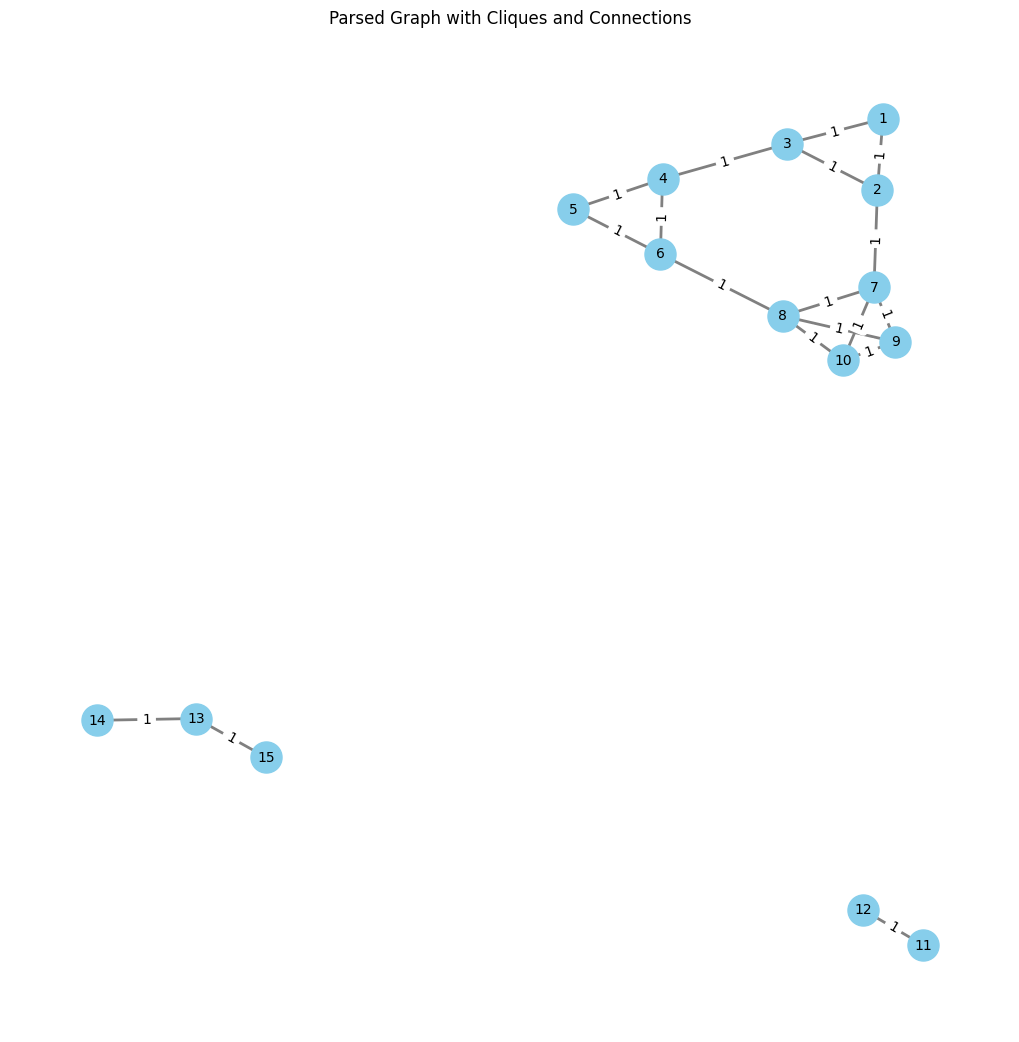

In [3]:
import re
import matplotlib.pyplot as plt
import networkx as nx

# Graph definition as a string
graph_definition = """
Graph 
            { vertices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
            , edges = [ (1, 1, 2), (2, 1, 3), (1, 1, 3)  -- Clique 1: Nodes 1, 2, 3
                      , (4, 1, 5), (5, 1, 6), (4, 1, 6)  -- Clique 2: Nodes 4, 5, 6
                      , (7, 1, 8), (8, 1, 9), (9, 1, 10), (7, 1, 9), (7, 1, 10), (8, 1, 10)  -- Clique 3: Nodes 7, 8, 9, 10
                      , (3, 1, 4)  -- Connect Clique 1 to Clique 2
                      , (2, 1, 7)  -- Connect Clique 1 to Clique 3
                      , (6, 1, 8)  -- Connect Clique 2 to Clique 3
                      , (11, 1, 12)  -- Isolated edge, not part of any clique
                      , (13, 1, 14), (13, 1, 15)  -- Small non-clique group: Nodes 13, 14, 15
                      ]
            }
"""

# Function to parse the graph definition
def parse_graph(graph_def):
    # Parse vertices
    vertices_match = re.search(r"vertices\s*=\s*\[(.*?)\]", graph_def)
    vertices = list(map(int, vertices_match.group(1).split(','))) if vertices_match else []
    
    # Parse edges
    edges_match = re.findall(r"\((\d+),\s*(\d+),\s*(\d+)\)", graph_def)
    edges = [(int(v1), int(weight), int(v2)) for v1, weight, v2 in edges_match]
    
    return vertices, edges

# Function to draw the graph
def draw_graph(vertices, edges):
    G = nx.Graph()
    G.add_nodes_from(vertices)  # Ensure all vertices are added, even if isolated
    for v1, weight, v2 in edges:
        G.add_edge(v1, v2, weight=weight)

    # Use spring layout for a more natural layout of cliques and connections
    pos = nx.spring_layout(G, seed=42)  # Fixed seed for reproducibility

    # Draw nodes and edges
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', width=2, font_size=10, node_size=500)
    
    # Add edge weights (although in this case, all weights are '1')
    edge_labels = {(v1, v2): weight for v1, weight, v2 in edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    # Display the graph
    plt.title("Parsed Graph with Cliques and Connections")
    plt.show()

# Parse the graph and draw it
vertices, edges = parse_graph(graph_definition)
draw_graph(vertices, edges)
